# Task 2

In [58]:
#import libraries
import numpy as np
import pandas as pd
import nltk
import string

In [14]:
review_raw = pd.read_csv('labeledTrainData.tsv', sep = '\t', header = 0)

In [59]:
review_raw.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [17]:
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [45]:
df = pd.DataFrame(review_raw)

In [47]:
review_raw['review'].isnull().sum()

0

In [48]:
review = review_raw['review']
review.head(10)

0    With all this stuff going down at the moment w...
1    \The Classic War of the Worlds\" by Timothy Hi...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
5    I dont know why people think this is such a ba...
6    This movie could have been very good, but come...
7    I watched this video at a friend's house. I'm ...
8    A friend of mine bought this film for £1, and ...
9    <br /><br />This movie is full of references. ...
Name: review, dtype: object

In [51]:
#Remove Punctuations
trantable = str.maketrans("","",string.punctuation)
def data_clean(text):
    text = text.lower()
    text_clean = text.translate(trantable)
    return text_clean

In [54]:
review = review.apply(lambda x: data_clean(x))

In [56]:
review

0        with all this stuff going down at the moment w...
1        the classic war of the worlds by timothy hines...
2        the film starts with a manager nicholas bell g...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious 8...
5        i dont know why people think this is such a ba...
6        this movie could have been very good but comes...
7        i watched this video at a friends house im gla...
8        a friend of mine bought this film for £1 and e...
9        br br this movie is full of references like ma...
10       what happens when an army of wetbacks towelhea...
11       although i generally do not like remakes belie...
12       mr harvey lights a candle is anchored by a bri...
13       i had a feeling that after submerged this one ...
14       note to george litman and others the mystery s...
15       stephen king adaptation scripted by king himse...
16       the matrix was an exciting summer blockbuster .

Q: How can I remove the <b/r> stuffs? 
<n> The total comments, should be 25000

In [60]:
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords

In [61]:
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

In [74]:
example = review[:100]
corpus_w_stopword = [word_tokenize(review) for review in example]

In [75]:
corpus_wo_stopword = [remove_stopword(review) for review in corpus_w_stopword]
corpus_wo_stopword[:10]

[['stuff',
  'going',
  'moment',
  'mj',
  'ive',
  'started',
  'listening',
  'music',
  'watching',
  'odd',
  'documentary',
  'watched',
  'wiz',
  'watched',
  'moonwalker',
  'maybe',
  'want',
  'get',
  'certain',
  'insight',
  'guy',
  'thought',
  'really',
  'cool',
  'eighties',
  'maybe',
  'make',
  'mind',
  'whether',
  'guilty',
  'innocent',
  'moonwalker',
  'part',
  'biography',
  'part',
  'feature',
  'film',
  'remember',
  'going',
  'see',
  'cinema',
  'originally',
  'released',
  'subtle',
  'messages',
  'mjs',
  'feeling',
  'towards',
  'press',
  'also',
  'obvious',
  'message',
  'drugs',
  'bad',
  'mkaybr',
  'br',
  'visually',
  'impressive',
  'course',
  'michael',
  'jackson',
  'unless',
  'remotely',
  'like',
  'mj',
  'anyway',
  'going',
  'hate',
  'find',
  'boring',
  'may',
  'call',
  'mj',
  'egotist',
  'consenting',
  'making',
  'movie',
  'mj',
  'fans',
  'would',
  'say',
  'made',
  'fans',
  'true',
  'really',
  'nice',
 

* In the command above, it took a ***lot*** of time of the kernel

# Task 3

In [92]:
def build_corpus(dataset):
    corpus = []
    for text in dataset:
        # without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))  
    return corpus

In [95]:
text = nltk.Text(corpus_wo_stopword[0])
text

<Text: stuff going moment mj ive started listening music...>

* How cam I process all reviews in the review.raw?

In [88]:
with open('trump.txt', mode='r', encoding='UTF-8') as f:
    trump = f.read()

In [90]:
trump

'Ronald Reagan Building and International Trade Center\n\nWashington, D.C.\n\n2:03 P.M. EST\n\nTHE PRESIDENT:  Thank you very much.  Thank you.  Please.  I want to thank Vice President Pence, along with the many members of my Cabinet here with us today.\n\nI also want to thank all of the dedicated professionals — military, civilian, and law enforcement — who devote their lives to serving our nation.  In particular, I want to recognize General Dunford and the members of the Joint Chiefs of Staff.  Thank you, thank you, thank you.  (Applause.)\n\nIn addition, we are honored to be joined by House Majority Leader Kevin McCarthy, Homeland Security Chairman Mike McCaul, and Senate Majority Whip John Cornyn.  Thank you very much.  Thank you for being here.  Thank you.  Thank you.  (Applause.)\n\nLet me begin by expressing our deepest sympathies and most heartfelt prayers for the victims of the train derailment in Washington State.  We are closely monitoring the situation and coordinating with

* Why do I have to add the additional stuffs to read trump.txt properly?

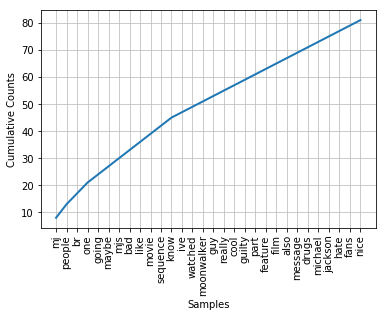

In [97]:
text_fq = nltk.FreqDist(text)
text_fq.plot(30,cumulative=True)

In [105]:
hot_phrase = text.collocations()
hot_phrase

feature film; michael jackson
